<a href="https://colab.research.google.com/github/ednavivianasegura/ERAP_CursoPython/blob/main/Modulo1_b/12_transformaciones_imagen_numpy_matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Transformaciones creativas de imágenes con NumPy y visualización con Matplotlib
Este notebook aplica funciones matemáticas como seno, coseno y exponencial sobre imágenes binarias, y muestra el resultado con `matplotlib`.

In [ ]:
!git clone https://github.com/ednavivianasegura/ERAP_CUrsoPython.git

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt



Cloning into 'ERAP_CUrsoPython'...
remote: Enumerating objects: 235, done.
remote: Counting objects: 100% (52/52), done.
remote: Compressing objects: 100% (44/44), done.
remote: Total 235 (delta 30), reused 7 (delta 7), pack-reused 183 (from 1)
Receiving objects: 100% (235/235), 12.69 MiB | 5.03 MiB/s, done.
Resolving deltas: 100% (91/91), done.
Updating files: 100% (71/71), done.


In [ ]:
#Configurar el path de las imágenes:
file_path="/content/ERAP_CUrsoPython/Modulo1_b/"

## 1. Cargar imagen y convertirla en matriz binaria

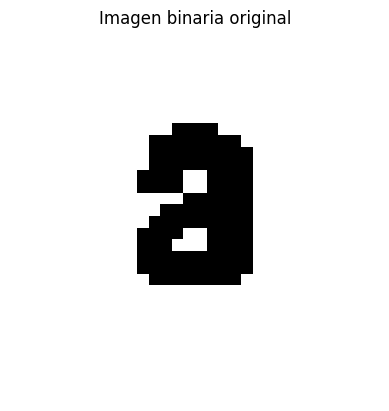

In [ ]:
imagen = Image.open(file_path+"letra_A.jpg").convert("L")
imagen = imagen.resize((32, 32))
arr = np.array(imagen)
binaria = (arr > 128).astype(float)
plt.imshow(binaria, cmap="gray")
plt.title("Imagen binaria original")
plt.axis("off")
plt.show()


## 2. Modulación senoidal vertical

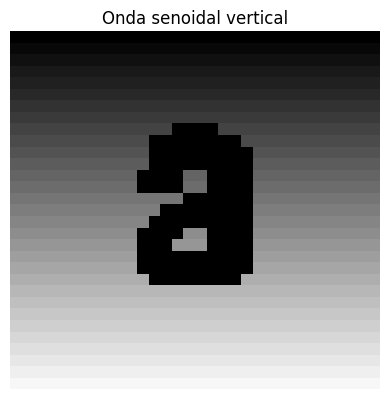

In [ ]:
def onda_seno(imagen, frecuencia=0.01):
    alto, ancho = imagen.shape
    y = np.arange(alto).reshape(-1, 1)
    mod_sin = np.sin(frecuencia * y)
    return (imagen * mod_sin).clip(0, 1)

resultado = onda_seno(binaria)
plt.imshow(resultado, cmap="gray")
plt.title("Onda senoidal vertical")
plt.axis("off")
plt.show()


## 3. Ruido senoidal (interferencia visual)

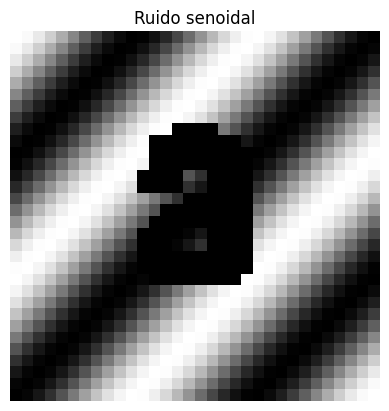

In [ ]:
def ruido_periodico(imagen, frecuencia=1.5):
    alto, ancho = imagen.shape
    x = np.linspace(0, np.pi * 2, ancho)
    y = np.linspace(0, np.pi * 2, alto)
    xv, yv = np.meshgrid(x, y)
    ruido = 0.5 + 0.5 * np.cos(frecuencia * (xv + yv))
    return (imagen * ruido).clip(0, 1)

resultado = ruido_periodico(binaria)
plt.imshow(resultado, cmap="gray")
plt.title("Ruido senoidal")
plt.axis("off")
plt.show()


## 4. Máscara circular

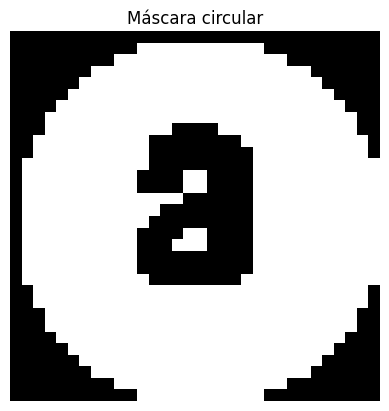

In [ ]:
def mascara_circular(imagen):
    alto, ancho = imagen.shape
    y, x = np.ogrid[:alto, :ancho]
    cx, cy = ancho // 2, alto // 2
    distancia = np.sqrt((x - cx)**2 + (y - cy)**2)
    radio = min(cx, cy)
    mascara = (distancia < radio).astype(float)
    return imagen * mascara

resultado = mascara_circular(binaria)
plt.imshow(resultado, cmap="gray")
plt.title("Máscara circular")
plt.axis("off")
plt.show()


## 5. Ondas concéntricas

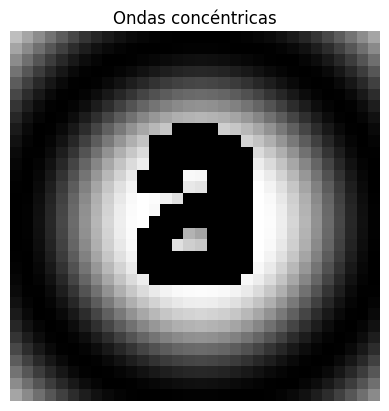

In [ ]:
def onda_concentrica(imagen, frecuencia=0.3):
    alto, ancho = imagen.shape
    y, x = np.ogrid[:alto, :ancho]
    cx, cy = ancho // 2, alto // 2
    distancia = np.sqrt((x - cx)**2 + (y - cy)**2)
    ondas = 0.5 + 0.5 * np.sin(distancia * frecuencia)
    return (imagen * ondas).clip(0, 1)

resultado = onda_concentrica(binaria)
plt.imshow(resultado, cmap="gray")
plt.title("Ondas concéntricas")
plt.axis("off")
plt.show()
